## Projeto de Redes Sociais

In [13]:
import freeman as fm
import statsmodels.api as sm
import networkx as nx
import pylab

In [14]:
def proportion(g, n, m):
    return 1 / g.degree(n)

def local_effsize(g, n, m):
    s = 1
    for k in g.neighbors(n):
        if g.has_edge(k, m):
            s -= proportion(g, n, k)
    return s

def effsize(g, n):
    s = 0
    for m in g.neighbors(n):
        s += local_effsize(g, n, m)
    return s

In [15]:
g = fm.load('data/lol_teams.gml')

In [16]:
g.set_all_nodes(size=15, labpos='hover')
g.set_all_edges(color=(0, 0, 0, 0.5))
g.move('kamada_kawai')
g.draw()

In [17]:
teams_perf = []
teams_eff = []
for n in g.nodes:
    teams_perf.append(g.nodes[n]['perf'])
    teams_eff.append(effsize(g, n))

<ipython-input-18-498bfeeffab0>:6: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



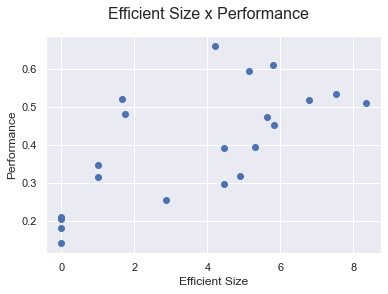

In [18]:
ax = pylab.subplot(111)
ax.scatter(teams_eff, teams_perf)
pylab.xlabel('Efficient Size')
pylab.ylabel('Performance')
pylab.suptitle('Efficient Size x Performance', fontsize=16)
ax.figure.show()

In [19]:
model = sm.OLS(teams_perf, teams_eff)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.803
Method:                 Least Squares   F-statistic:                              86.37
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    1.07e-08
Time:                        00:52:25   Log-Likelihood:                          5.6298
No. Observations:                  21   AIC:                                     -9.260
Df Residuals:                      20   BIC:                                     -8.215
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0856      0.009      9.294      0.000       0.066       0.105
==============================================================================
Omnibus:                        3.017   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                1.259
Skew:                           0.063   Prob(JB):                        0.533
Kurtosis:                       1.807   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""